# PH150 Week 7
Last week you made your model 2-D and incorporated drag.  This makes your model very good at predicting the trajectory of a ball, but we want to predict the motion of a rocket.  For this we need to add a few more things.  This week we will add the affects the force of the rocket engine and the change in area due to the parachute opening. You may also add the affects of wind.   But first we'll look at how to handle error. You should of done some of this last week. 

# Error in prediction with a computer model
Early this semester (week 2) we looked at how to get the error of something that is calculated.  We looked at the general form for error propigation:
$$\sigma_x^2=\sigma_u^2(\frac{\partial f}{\partial u})^2+\sigma_v^2(\frac{\partial f}{\partial v})^2+\sigma_q^2(\frac{\partial f}{\partial q})^2$$

And we looked at how this is applied for specific forms.  It turns out that for most simple equations the ratio equation works:
$$(\frac{\sigma_x}{x})^2=(\frac{\sigma_u}{u})^2+(\frac{\sigma_v}{v})^2+(\frac{\sigma_q}{q})^2$$

This form would not work for things that are calculated with $\sin$ or $\log$, ect.  It also doesn't work for a computer program.  The model we've developed that predicts the trajectory of a rocket has equations, but it is unclear how to incorporate the error in our measurements to find the error in our predicted values.

First let's state the problem.  You have a model that when you input initial conditions for position and velocity and also input the drag parameters like the area, the density of air, etc then it will tell you the position, velocity and acceleration at any given time.  We need more than just those values at any time though.  We need to know the error in those values based off the error in the things we put in.

This can be done simply by looking at the results for a large sample of different inputs.  So you change each of your inputs by an amount equal to the corresponding error.  You then do this again and again changing each input differently each time.  Then collect the results and look at the spread.  If you know how each input affects the output you can simple change each one to one extream run the simpulationg then do it again on the other extream. If you don't know just how each imput affects the outcome then its best to randomly chooe values in the range of posibilities for each input.  Then run the simulation lots and lots of times to get a spread for the outcome.

## Example
First I want to create a function that I can send all of my initial conditions to and will return that I want.  I'll stick with a projectile motion example, but this process works well for any system. When looking at this example please look through the code.  Read each line and think about what it means and how the computer will 'think' about it. Note this is just taking what you have done and wrapping it into a function like this
``` python 
def proj(input_ parameters) # I've called this proj, but it can be called what ever makes the most sense to you

    Stuff you already wrote
    
    return number #this should be what ever variable you want the function send you. In this case probably the last value of x
```
This example is my version of what you've had to do over the last few weeks. Do not just copy it. If you have something that works well use it. I show this here so that you can see other ways of doing the same thing. It is also helpful for you to see others code and figure out what it is doing. Also note all the comments. Your code should also be commented as much or more than this. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

def proj(y0,v0,theta,A,C,rho,m):
    #first define some constants to make the code easier to read
    theta_rad=theta*np.pi/180       #convert theta from degrees to radians
    Dc=0.5*A*C*rho/m                # the drag constants to make the code cleaner
    g=-9.8                          # the gravitational acceleration constant in m/s2
    dt=0.01                         # the time step, must be small to give good results
    
    # initialize my lists/arrays to use in the while loop
    x=[0]                           #initialize position in x direction 
    y=[y0]                          #initialize position in y direction using inital y position
    vx=[v0*np.cos(theta_rad)]       #initialize velocity in x direction using inital velocity and trig
    vy=[v0*np.sin(theta_rad)]       #initialize velocity in x direction using inital velocity and trig
    
    magv=(vx[-1]**2+vy[-1]**2)**0.5 # the magnitude of v, again to keep the next line cleaner
    ax=[ -Dc*magv*vx[-1] ]          #initialize acceleration in x direction ax=Fx/m
    ay=[ -Dc*magv*vy[-1] + g ]      #initialize acceleration in x direction ax=Fx/m
    
    #The while loop to update and add a new value in list/array
    while (y[-1]>0):
        x.append( x[-1]+vx[-1]*dt )             #update position in x direction 
        y.append( y[-1]+vy[-1]*dt )             #update position in y direction using inital y position
        vx.append( vx[-1]+ax[-1]*dt )           #update velocity in x direction using inital velocity and trig
        vy.append( vy[-1]+ay[-1]*dt )           #update velocity in x direction using inital velocity and trig
        
        magv=(  vx[-1]**2 + vy[-1]**2  )**0.5   # recalulate the magnitude of v, with new values
        ax.append( -Dc*magv*vx[-1] )            #recalculate acceleration in x direction ax=Fx/m using new values for velocity
        ay.append( -Dc*magv*vy[-1] + g )        #recalculate acceleration in x direction ax=Fx/m using new values for velocity
    
    plt.plot(x,y)
    return x[-1] # it might be usuful to return more than just the last value in x

Now to use the function. I 'call' it like so 
```python 
proj(1,3,40,0.02,0.5,1.2,0.01)
```
But I also want it to print out it's return value, so I put the whole thing in a print function like so

1.075520651098257
1.2858789953777683
1.6086933305498532


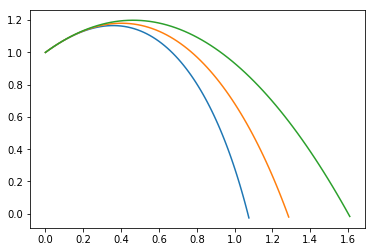

In [2]:
print(proj(1,3,40,0.02,0.5,1.2,0.01))
print(proj(1,3,40,0.02,0.5,1.2,0.02))
print(proj(1,3,40,0.02,0.0,1.2,0.01))

As you can see by calling this function multiple times with slightly different input parameters you can get a feel for the range of possible outcomes.  This can be automated with another loop (optional assignment at the end).  But for now just try some different values and look at the outcome.

## <b><span style="color:red;">Your Assignment:</span></b>  
- If you haven't already, turn <u>your</u> projectile code into a function.  This should allow input for initial conditions and output the final x value.
- Use this function to get a feel for the affects of changes in the input values and the output value.
- Choose input values on both extremes and note the range in the final x values.
- Compare this range to the error you got last week when you predicted and then launch the projectile and measure the final position.

# Rocket Engine

To predict the trajectory of a rocket we must look at the effects of the rocket's engine.  We can model the effects of the engine by looking at it's force as a function of time.  Graphs for this function for different kinds of engines are readily available on-line. Take a look at [this](http://www.hobbylinc.com/rockets/info/rockets_enginefacts.htm) description of how this work and are rated. [Here](https://www.grc.nasa.gov/WWW/K-12/rocket/rktenglab.html) is another good site. Below is an example for the B-6 Engine.

![](http://www.hobbylinc.com/rockets/group/b6_4thrust.gif)

You will need to make a function that models this an other engines.  Rather than try to do this with complicated math we can model each part with a line and use if statements to decide when to use what line.

If statement use a condition to tell the computer whether or not to run some code.  The formate is similar to the while loop, but the if only runs once.  Here is a simple example:



In [3]:
t=0.3
if (t<0.3):
    F=5
if (t>0.3):
    F=6
else:
    F=1

print(F)        

1


The else at the end is just something to catch conditions that may not of been met with the if statement. It only 'catches' the last if.  We can also use the elif function.  elif is short for else if.

In [4]:
t=3
if(t>0.3):
    F=5
elif(t<0.3):
    F=6

print(F)

5


## <b><span style="color:red;">Your Assignment:</span></b>  
- Create a python function that models the rocket engine B-6 by using if statements and straight lines. Your function should output a thrust(i.e. force) of an engine as a function of time. 
- Test your function by using it to reproduce the graph in the photo.
- Use your function in your projectile function to model the trajectory of your rocket.

# Area
The parachute opening after the engine pops it out can be modeled by making the area a function. This function simply returns the value of the area of the rocket when it is given the time from the beginning of the launch. It might look something like this:
```python
def Area(time)
    if (time<6):
        A=0.2
    else:      # after t is more than 6
        A=.8
    return A
```
Then this function can be used in place of the area in your function that models the trajectory of the rocket.

## <b><span style="color:red;">Your Assignment:</span></b>  
- Create a python function that models the rocket's area. Your function should output a area as a function of time. 
- Test your function by making a graph of area vs time.
- Use your function in your projectile function to model the trajectory of your rocket.

# Wind
Wind can have a huge effect on the trajectory of a rocket.  It will come into your projectile function by affecting drag.  Drag is an interaction between the projectile and the air around it.  When the air around it is moving we need to account for it.  The velocity that matters when calculating drag is the velocity relative to the air, not the velocity relative to the ground.  This relative to the air velocity can be found by simply subtracting the wind velocity.
$$v_{air}=v_{ground}-v_{wind}$$
If we assume that the wind is only in the $x$ direction then this subtraction only needs to be done to the $x$ component of the velocity.

## <b><span style="color:red;">Optional Assignment:</span></b>  
- Modify your code to account for wind.
- assume a wind speed of around 10m/s and test your function.

# Optional automated error calculation 
Rather than just choosing extremes for the input parameters it is interesting to choose random values withing the range and then run the functions multiple times.  Each time the final result is kept.  These results are then used to find the average and standard deviation to get a better feel for the error.

0.9095409170589095
1.0360160626333275


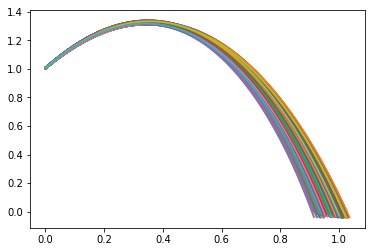

In [5]:
import random
# set all the min and max for the input parameters
y0max=1.01
y0min=1.00
v0max=3.01
v0min=2.99
thetamax=61
thetamin=59
Amax=0.015
Amin=0.014
Cmax=0.75
Cmin=0.5
rhomax=1.21
rhomin=1.19
mmax=0.020
mmin=0.019
# initialize the x list
x=[]

i=0 # just a counter so the while loop only goes so many times
while (i<1000):
    
    i=i+1 # increment i so the while loop ends after so many times
    
    # set random values between min and max for each parameter
    y0=random.uniform(y0min,y0max)
    v0=random.uniform(v0min,v0max)
    theta=random.uniform(thetamin,thetamax)
    A=random.uniform(Amin,Amax)
    C=random.uniform(Cmin,Cmax)
    rho=random.uniform(rhomin,rhomax)
    m=random.uniform(mmin,mmax)
    
    # make list of end results for each random input values
    x.append(proj(y0,v0,theta,A,C,rho,m))

#out min and max values
print(min(x))
print(max(x))

As you can see the range for the final position is between 0.90 and 1.05.  Another way to show what is happening is do do a histogram on the final x list.

(array([ 3.,  2.,  3.,  5.,  3., 16., 10.,  9., 12., 21., 18., 21., 20.,
        15., 28., 22., 34., 30., 25., 40., 34., 36., 24., 33., 38., 35.,
        35., 28., 32., 33., 31., 24., 27., 29., 27., 29., 24., 17., 20.,
        16., 18., 17., 18.,  9., 12.,  6.,  4.,  2.,  4.,  1.]),
 array([0.90954092, 0.91207042, 0.91459992, 0.91712943, 0.91965893,
        0.92218843, 0.92471793, 0.92724744, 0.92977694, 0.93230644,
        0.93483595, 0.93736545, 0.93989495, 0.94242445, 0.94495396,
        0.94748346, 0.95001296, 0.95254247, 0.95507197, 0.95760147,
        0.96013098, 0.96266048, 0.96518998, 0.96771948, 0.97024899,
        0.97277849, 0.97530799, 0.9778375 , 0.980367  , 0.9828965 ,
        0.985426  , 0.98795551, 0.99048501, 0.99301451, 0.99554402,
        0.99807352, 1.00060302, 1.00313252, 1.00566203, 1.00819153,
        1.01072103, 1.01325054, 1.01578004, 1.01830954, 1.02083905,
        1.02336855, 1.02589805, 1.02842755, 1.03095706, 1.03348656,
        1.03601606]),
 <a list of 50

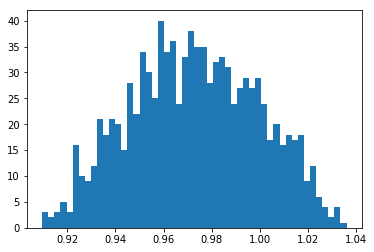

In [6]:
plt.hist(x,50)

## <b><span style="color:red;">Optional Assignment:</span></b>  
- use random numbers to make a list of possible values for the final range of <u>your</u> projectile function.
- make a histogram of these values